In [1]:
#Importing libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re
pd.pandas.set_option('display.max_columns', None)
pd.pandas.set_option('display.max_rows', None)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data PreProcessing On Train Data

In [3]:
#Reading train data set
train=pd.read_csv("train.csv")

In [4]:
train.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,1000,1154,114,BOS,CLE,563,20/09/04 11:54
1,CLE_ATL_44346,2004,11,19,5,1440,1634,114,CLE,ATL,554,19/11/04 18:55
2,SNA_LAS_44378,2004,5,4,2,1800,1902,62,SNA,LAS,226,04/05/04 19:02
3,CLT_TPA_51502,2004,7,6,2,1400,1533,93,CLT,TPA,508,06/07/04 15:33
4,MSP_ORD_44884,2004,9,23,4,830,946,76,MSP,ORD,334,23/09/04 09:46


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   FlightNumber            7861 non-null   object
 1   Year                    7861 non-null   int64 
 2   Month                   7861 non-null   int64 
 3   DayofMonth              7861 non-null   int64 
 4   DayOfWeek               7861 non-null   int64 
 5   ScheduledDepTime        7861 non-null   int64 
 6   ScheduledArrTime        7861 non-null   int64 
 7   ScheduledTravelTime     7861 non-null   int64 
 8   Origin                  7861 non-null   object
 9   Destination             7861 non-null   object
 10  Distance                7861 non-null   int64 
 11  ActualArrivalTimeStamp  7861 non-null   object
dtypes: int64(8), object(4)
memory usage: 737.1+ KB


In [6]:
train.shape

(7861, 12)

In [7]:
train.isnull().sum()

FlightNumber              0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
ScheduledDepTime          0
ScheduledArrTime          0
ScheduledTravelTime       0
Origin                    0
Destination               0
Distance                  0
ActualArrivalTimeStamp    0
dtype: int64

In [8]:
#Converting time to datetime in train data set
train.ScheduledDepTime = train.ScheduledDepTime.astype(str).str.zfill(4)
train.ScheduledArrTime = train.ScheduledArrTime.astype(str).str.zfill(4)
train.ScheduledDepTime = pd.to_datetime(train.ScheduledDepTime, format="%H%M").dt.time
train.ScheduledArrTime = pd.to_datetime(train.ScheduledArrTime, format="%H%M").dt.time
train.ActualArrivalTimeStamp = pd.to_datetime(train.ActualArrivalTimeStamp, format='%d/%m/%y %H:%M')

In [9]:
train.head()

,FlightNumber,Year,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004,9,20,1,10:00:00,11:54:00,114,BOS,CLE,563,2004-09-20 11:54:00
1,CLE_ATL_44346,2004,11,19,5,14:40:00,16:34:00,114,CLE,ATL,554,2004-11-19 18:55:00
2,SNA_LAS_44378,2004,5,4,2,18:00:00,19:02:00,62,SNA,LAS,226,2004-05-04 19:02:00
3,CLT_TPA_51502,2004,7,6,2,14:00:00,15:33:00,93,CLT,TPA,508,2004-07-06 15:33:00
4,MSP_ORD_44884,2004,9,23,4,08:30:00,09:46:00,76,MSP,ORD,334,2004-09-23 09:46:00


In [10]:
train.DayofMonth = train.DayofMonth.astype(str).str.zfill(2)
train.Month = train.Month.astype(str).str.zfill(2)
train.Year = train.Year.astype(str).str.zfill(4)

In [11]:
train.Year = pd.to_datetime(train.Year + "/" + train.Month + "/" + train.DayofMonth)

In [12]:
train.Year = train.apply(lambda r : pd.datetime.combine(r['Year'],r['ScheduledDepTime']),1)

In [13]:
train.rename(columns = {'Year':'Date'}, inplace = True)

In [14]:
train.head()

,FlightNumber,Date,Month,DayofMonth,DayOfWeek,ScheduledDepTime,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004-09-20 10:00:00,09,20,1,10:00:00,11:54:00,114,BOS,CLE,563,2004-09-20 11:54:00
1,CLE_ATL_44346,2004-11-19 14:40:00,11,19,5,14:40:00,16:34:00,114,CLE,ATL,554,2004-11-19 18:55:00
2,SNA_LAS_44378,2004-05-04 18:00:00,05,04,2,18:00:00,19:02:00,62,SNA,LAS,226,2004-05-04 19:02:00
3,CLT_TPA_51502,2004-07-06 14:00:00,07,06,2,14:00:00,15:33:00,93,CLT,TPA,508,2004-07-06 15:33:00
4,MSP_ORD_44884,2004-09-23 08:30:00,09,23,4,08:30:00,09:46:00,76,MSP,ORD,334,2004-09-23 09:46:00


In [15]:
#Drop  Dayofmonth
#Drop scheduleddeptime from train data because we have scheduleddeptime is in date
train = train.drop([ 'DayofMonth','ScheduledDepTime'],axis = 1)
train.head()

,FlightNumber,Date,Month,DayOfWeek,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004-09-20 10:00:00,09,1,11:54:00,114,BOS,CLE,563,2004-09-20 11:54:00
1,CLE_ATL_44346,2004-11-19 14:40:00,11,5,16:34:00,114,CLE,ATL,554,2004-11-19 18:55:00
2,SNA_LAS_44378,2004-05-04 18:00:00,05,2,19:02:00,62,SNA,LAS,226,2004-05-04 19:02:00
3,CLT_TPA_51502,2004-07-06 14:00:00,07,2,15:33:00,93,CLT,TPA,508,2004-07-06 15:33:00
4,MSP_ORD_44884,2004-09-23 08:30:00,09,4,09:46:00,76,MSP,ORD,334,2004-09-23 09:46:00


In [16]:
#Rename Date as Departure Time
train.rename(columns = {'Date':'DepartureTime'}, inplace = True)
train.head()

,FlightNumber,DepartureTime,Month,DayOfWeek,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004-09-20 10:00:00,09,1,11:54:00,114,BOS,CLE,563,2004-09-20 11:54:00
1,CLE_ATL_44346,2004-11-19 14:40:00,11,5,16:34:00,114,CLE,ATL,554,2004-11-19 18:55:00
2,SNA_LAS_44378,2004-05-04 18:00:00,05,2,19:02:00,62,SNA,LAS,226,2004-05-04 19:02:00
3,CLT_TPA_51502,2004-07-06 14:00:00,07,2,15:33:00,93,CLT,TPA,508,2004-07-06 15:33:00
4,MSP_ORD_44884,2004-09-23 08:30:00,09,4,09:46:00,76,MSP,ORD,334,2004-09-23 09:46:00


In [17]:
# Reading All stataions data 
Allstationsdata=pd.read_csv("AllStationsData_PHD.txt",sep='|')

In [18]:
Allstationsdata.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,+7
1,3012,SKX,0,0,0,36.28,-105.40,+7
2,3013,LAA,3683,3703,3675,38.04,-102.41,+7
3,3014,4SL,0,6909,0,35.47,-107.14,+7
4,3016,RIL,5503,5544,5506,39.32,-107.44,+7


In [19]:
Allstationsdata.TimeZone.unique()

array(['+7', '+6', '+8', '+5', '+4', '+9', '+10', 'Yukon Standard', '-10',
       'Bering Standard', 'Alaska-Hawaii', 'Eastern Standard'],
      dtype=object)

In [20]:
Allstationsdata.rmtimezone = ['-10', 'Yukon Standard','Bering Standard','Alaska-Hawaii','Eastern Standard']
Allstationsdata= Allstationsdata[~Allstationsdata.TimeZone.isin(Allstationsdata.rmtimezone)]
Allstationsdata= Allstationsdata.reset_index(drop=True)

In [21]:
Allstationsdata.TimeZone.unique()

array(['+7', '+6', '+8', '+5', '+4', '+9', '+10'], dtype=object)

In [22]:
Allstationsdata.head()

,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3011,TEX,0,0,0,37.57,-107.55,+7
1,3012,SKX,0,0,0,36.28,-105.40,+7
2,3013,LAA,3683,3703,3675,38.04,-102.41,+7
3,3014,4SL,0,6909,0,35.47,-107.14,+7
4,3016,RIL,5503,5544,5506,39.32,-107.44,+7


In [23]:
Allstationsdata.TimeZone= pd.to_numeric(Allstationsdata.TimeZone)

In [24]:
Allstationsdata.TimeZone =  pd.TimedeltaIndex(Allstationsdata.TimeZone, unit='h')

In [25]:
Allstationsdata.isnull().sum()

WeatherStationID    0
AirportID           0
GroundHeight        0
StationHeight       0
BarometerHeight     0
Latitude            0
Longitude           0
TimeZone            0
dtype: int64

In [26]:
train.info()
Allstationsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   FlightNumber            7861 non-null   object        
 1   DepartureTime           7861 non-null   datetime64[ns]
 2   Month                   7861 non-null   object        
 3   DayOfWeek               7861 non-null   int64         
 4   ScheduledArrTime        7861 non-null   object        
 5   ScheduledTravelTime     7861 non-null   int64         
 6   Origin                  7861 non-null   object        
 7   Destination             7861 non-null   object        
 8   Distance                7861 non-null   int64         
 9   ActualArrivalTimeStamp  7861 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 614.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 8 column

In [27]:
# Converting ScheduledDepTime to UTC dep time
# Using time zone from all station data
a=0
for i in train.Origin:
    b=0
    for j in Allstationsdata.AirportID:
        if (i==j): 
            #print ("Matchfound       Origin:",i," DepartureTime:",train.DepartureTime[a],"    index(a):",a)
            #print("              AirportID:",j,"   timezone:",Allstationsdata.TimeZone[b],"        index(b):",b)
            #for k in range(80): print("_",end='')
            #print("")
            train.DepartureTime[a] = train.DepartureTime[a] + Allstationsdata.TimeZone[b]
        b=b+1               
    a=a+1

In [28]:
train.rename(columns = {'DepartureTime':'UTC_Deptime'}, inplace = True)
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,ScheduledArrTime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,11:54:00,114,BOS,CLE,563,2004-09-20 11:54:00
1,CLE_ATL_44346,2004-11-19 19:40:00,11,5,16:34:00,114,CLE,ATL,554,2004-11-19 18:55:00
2,SNA_LAS_44378,2004-05-05 02:00:00,05,2,19:02:00,62,SNA,LAS,226,2004-05-04 19:02:00
3,CLT_TPA_51502,2004-07-06 19:00:00,07,2,15:33:00,93,CLT,TPA,508,2004-07-06 15:33:00
4,MSP_ORD_44884,2004-09-23 14:30:00,09,4,09:46:00,76,MSP,ORD,334,2004-09-23 09:46:00


In [29]:
# Converting ScheduledArrTime to UTC arrival time
a=0
for i in train.UTC_Deptime:
    train.ScheduledArrTime[a] = train.UTC_Deptime[a] + pd.Timedelta(minutes=train.ScheduledTravelTime[a])
    a=a+1

In [30]:
train.rename(columns = {'ScheduledArrTime':'UTC_Arrtime'}, inplace = True)
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,ActualArrivalTimeStamp
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 11:54:00
1,CLE_ATL_44346,2004-11-19 19:40:00,11,5,2004-11-19 21:34:00,114,CLE,ATL,554,2004-11-19 18:55:00
2,SNA_LAS_44378,2004-05-05 02:00:00,05,2,2004-05-05 03:02:00,62,SNA,LAS,226,2004-05-04 19:02:00
3,CLT_TPA_51502,2004-07-06 19:00:00,07,2,2004-07-06 20:33:00,93,CLT,TPA,508,2004-07-06 15:33:00
4,MSP_ORD_44884,2004-09-23 14:30:00,09,4,2004-09-23 15:46:00,76,MSP,ORD,334,2004-09-23 09:46:00


In [31]:
# Conveting Scheduled Actual Arrival Time to UTC actual arrival time
a=0
for i in train.Destination:
    b=0
    for j in Allstationsdata.AirportID:
        if (i==j): 
            #print ("Matchfound       Destination:",i,"     actual arrival time:",train.ActualArrivalTimeStamp[a],"    index(a):",a)
            #print("                    AirportID:",j,"                   timezone:",Allstationsdata.TimeZone[b],"        index(b):",b)
            #for k in range(97): print("_",end='')
            #print("")
            train.ActualArrivalTimeStamp[a] = train.ActualArrivalTimeStamp[a] + Allstationsdata.TimeZone[b]
        b=b+1               
    a=a+1

In [32]:
train.rename(columns = {'ActualArrivalTimeStamp':'UTC_actual_arr'}, inplace = True)
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00
1,CLE_ATL_44346,2004-11-19 19:40:00,11,5,2004-11-19 21:34:00,114,CLE,ATL,554,2004-11-19 23:55:00
2,SNA_LAS_44378,2004-05-05 02:00:00,05,2,2004-05-05 03:02:00,62,SNA,LAS,226,2004-05-05 03:02:00
3,CLT_TPA_51502,2004-07-06 19:00:00,07,2,2004-07-06 20:33:00,93,CLT,TPA,508,2004-07-06 20:33:00
4,MSP_ORD_44884,2004-09-23 14:30:00,09,4,2004-09-23 15:46:00,76,MSP,ORD,334,2004-09-23 15:46:00


In [33]:
# calculating dealy time 
train['Delaytime'] = train.UTC_actual_arr - train.UTC_Arrtime
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00
1,CLE_ATL_44346,2004-11-19 19:40:00,11,5,2004-11-19 21:34:00,114,CLE,ATL,554,2004-11-19 23:55:00,0 days 02:21:00
2,SNA_LAS_44378,2004-05-05 02:00:00,05,2,2004-05-05 03:02:00,62,SNA,LAS,226,2004-05-05 03:02:00,0 days 00:00:00
3,CLT_TPA_51502,2004-07-06 19:00:00,07,2,2004-07-06 20:33:00,93,CLT,TPA,508,2004-07-06 20:33:00,0 days 00:00:00
4,MSP_ORD_44884,2004-09-23 14:30:00,09,4,2004-09-23 15:46:00,76,MSP,ORD,334,2004-09-23 15:46:00,0 days 00:00:00


In [34]:
# Calculating flight delay status
train['Flight_Delay_Status']=train['Delaytime']

In [35]:
# Assigning flight delay status values
# (1 if >15 mins) (2 if <15 mins)
a=0
for i in train.UTC_Deptime:
    if (train.Delaytime[a] > pd.Timedelta(minutes=15)):
        train.Flight_Delay_Status[a] = 1
    else:
        train.Flight_Delay_Status[a] = 2
    a=a+1

In [36]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2
1,CLE_ATL_44346,2004-11-19 19:40:00,11,5,2004-11-19 21:34:00,114,CLE,ATL,554,2004-11-19 23:55:00,0 days 02:21:00,1
2,SNA_LAS_44378,2004-05-05 02:00:00,05,2,2004-05-05 03:02:00,62,SNA,LAS,226,2004-05-05 03:02:00,0 days 00:00:00,2
3,CLT_TPA_51502,2004-07-06 19:00:00,07,2,2004-07-06 20:33:00,93,CLT,TPA,508,2004-07-06 20:33:00,0 days 00:00:00,2
4,MSP_ORD_44884,2004-09-23 14:30:00,09,4,2004-09-23 15:46:00,76,MSP,ORD,334,2004-09-23 15:46:00,0 days 00:00:00,2


# # Merging Allstationsdata with Train

In [37]:
train["Origin_ws_id"] = 0
train["Destination_ws_id"] = 0

In [38]:
a=0
for i in train.Origin:
    b=0
    for j in Allstationsdata.AirportID:
        if (i==j): 
            train["Origin_ws_id"][a] = Allstationsdata.WeatherStationID[b]
        b=b+1               
    a=a+1

In [39]:
a=0
for i in train.Destination:
    b=0
    for j in Allstationsdata.AirportID:
        if (i==j): 
            train["Destination_ws_id"][a] = Allstationsdata.WeatherStationID[b]
        b=b+1               
    a=a+1

In [40]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820
1,CLE_ATL_44346,2004-11-19 19:40:00,11,5,2004-11-19 21:34:00,114,CLE,ATL,554,2004-11-19 23:55:00,0 days 02:21:00,1,14820,13874
2,SNA_LAS_44378,2004-05-05 02:00:00,05,2,2004-05-05 03:02:00,62,SNA,LAS,226,2004-05-05 03:02:00,0 days 00:00:00,2,93184,23169
3,CLT_TPA_51502,2004-07-06 19:00:00,07,2,2004-07-06 20:33:00,93,CLT,TPA,508,2004-07-06 20:33:00,0 days 00:00:00,2,13881,12842
4,MSP_ORD_44884,2004-09-23 14:30:00,09,4,2004-09-23 15:46:00,76,MSP,ORD,334,2004-09-23 15:46:00,0 days 00:00:00,2,14922,94846


In [41]:
# Merging all station data with train data
# Using origin 
train = train.merge(Allstationsdata, left_on = "Origin_ws_id" ,right_on = "WeatherStationID")
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days,2,14739,14820,14739,BOS,19,30,180,42.22,-71.01,0 days 05:00:00
1,BOS_OAK_55049,2004-09-10 13:20:00,09,5,2004-09-10 20:00:00,400,BOS,OAK,2693,2004-09-10 20:00:00,0 days,2,14739,23230,14739,BOS,19,30,180,42.22,-71.01,0 days 05:00:00
2,BOS_RSW_47586,2004-03-22 12:00:00,03,1,2004-03-22 15:36:00,216,BOS,RSW,1249,2004-03-22 15:36:00,0 days,2,14739,12894,14739,BOS,19,30,180,42.22,-71.01,0 days 05:00:00
3,BOS_PIT_49759,2004-05-01 13:45:00,05,6,2004-05-01 15:31:00,106,BOS,PIT,496,2004-05-01 15:31:00,0 days,2,14739,94823,14739,BOS,19,30,180,42.22,-71.01,0 days 05:00:00
4,BOS_DCA_32791,2004-07-15 18:00:00,07,4,2004-07-15 19:30:00,90,BOS,DCA,399,2004-07-15 19:30:00,0 days,2,14739,13743,14739,BOS,19,30,180,42.22,-71.01,0 days 05:00:00


In [42]:
train.columns

Index(['FlightNumber', 'UTC_Deptime', 'Month', 'DayOfWeek', 'UTC_Arrtime',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'UTC_actual_arr', 'Delaytime', 'Flight_Delay_Status', 'Origin_ws_id',
       'Destination_ws_id', 'WeatherStationID', 'AirportID', 'GroundHeight',
       'StationHeight', 'BarometerHeight', 'Latitude', 'Longitude',
       'TimeZone'],
      dtype='object')

In [43]:
# Drop longitude,timezone,latitude,airport id, weatherstation id from train data
train = train.drop(['Longitude','TimeZone','Latitude','AirportID','WeatherStationID'],axis = 1)

In [44]:
# Rename columns
train.rename(columns = {"GroundHeight":"Origin_GroH","StationHeight":"Origin_StaH",
                        "BarometerHeight":"Origin_BaroH"}, inplace = True)

train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days,2,14739,14820,19,30,180
1,BOS_OAK_55049,2004-09-10 13:20:00,09,5,2004-09-10 20:00:00,400,BOS,OAK,2693,2004-09-10 20:00:00,0 days,2,14739,23230,19,30,180
2,BOS_RSW_47586,2004-03-22 12:00:00,03,1,2004-03-22 15:36:00,216,BOS,RSW,1249,2004-03-22 15:36:00,0 days,2,14739,12894,19,30,180
3,BOS_PIT_49759,2004-05-01 13:45:00,05,6,2004-05-01 15:31:00,106,BOS,PIT,496,2004-05-01 15:31:00,0 days,2,14739,94823,19,30,180
4,BOS_DCA_32791,2004-07-15 18:00:00,07,4,2004-07-15 19:30:00,90,BOS,DCA,399,2004-07-15 19:30:00,0 days,2,14739,13743,19,30,180


In [45]:
# Merging all station data with train 
# Using Destination
train = train.merge(Allstationsdata, left_on = "Destination_ws_id" ,right_on = "WeatherStationID")

In [46]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,WeatherStationID,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,14820,CLE,802,805,805,41.24,-81.51,0 days 05:00:00
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,14820,CLE,802,805,805,41.24,-81.51,0 days 05:00:00
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,14820,CLE,802,805,805,41.24,-81.51,0 days 05:00:00
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,14820,CLE,802,805,805,41.24,-81.51,0 days 05:00:00
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,14820,CLE,802,805,805,41.24,-81.51,0 days 05:00:00


In [47]:
train.columns

Index(['FlightNumber', 'UTC_Deptime', 'Month', 'DayOfWeek', 'UTC_Arrtime',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'UTC_actual_arr', 'Delaytime', 'Flight_Delay_Status', 'Origin_ws_id',
       'Destination_ws_id', 'Origin_GroH', 'Origin_StaH', 'Origin_BaroH',
       'WeatherStationID', 'AirportID', 'GroundHeight', 'StationHeight',
       'BarometerHeight', 'Latitude', 'Longitude', 'TimeZone'],
      dtype='object')

In [48]:
train = train.drop(['Longitude','TimeZone','Latitude','AirportID','WeatherStationID'],axis = 1)

In [49]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,GroundHeight,StationHeight,BarometerHeight
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805


In [50]:
# Rename columns
train.rename(columns = {"GroundHeight":"Des_GroH","StationHeight":"Des_StaH",
                        "BarometerHeight":"Des_BaroH"}, inplace = True)
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805


In [51]:
#Reading 2004 precipitation hpd data 
p1=pd.read_csv("200401hpd.txt")
p2=pd.read_csv("200403hpd.txt")
p3=pd.read_csv("200405hpd.txt")
p4=pd.read_csv("200407hpd.txt")
p5=pd.read_csv("200409hpd.txt")
p6=pd.read_csv("200411hpd.txt")

In [52]:
p_2004=[p1,p2,p3,p4,p5,p6]
precipitation_2004=pd.concat(p_2004)
precipitation_2004=precipitation_2004.reset_index(drop=True)

In [53]:
precipitation_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697386 entries, 0 to 7697385
Data columns (total 4 columns):
 #   Column            Dtype  
---  ------            -----  
 0   WeatherStationID  int64  
 1   YearMonthDay      int64  
 2   Time              int64  
 3   HourlyPrecip      float64
dtypes: float64(1), int64(3)
memory usage: 234.9 MB


In [54]:
precipitation_2004.describe().apply(lambda s: s.apply('{0:0.2f}'.format))

,WeatherStationID,YearMonthDay,Time,HourlyPrecip
count,7697386.00,7697386.00,7697386.00,7446120.00
mean,37059.10,20040547.57,1198.60,0.00
std,34298.01,333.61,691.07,0.04
min,3011.00,20040101.00,10.00,0.00
25%,4963.00,20040308.00,615.00,0.00
50%,23184.00,20040514.00,1212.00,0.00
75%,63805.00,20040902.00,1806.00,0.00
max,94999.00,20041130.00,2359.00,10.02


In [55]:
7697386-7446120

251266

In [56]:
precipitation_2004.Time = precipitation_2004.Time.astype(str).str.zfill(4)
precipitation_2004.Time = pd.to_datetime(precipitation_2004.Time, format="%H%M").dt.time

In [57]:
precipitation_2004.YearMonthDay = pd.to_datetime(precipitation_2004.YearMonthDay, format="%Y%m%d")
precipitation_2004.Time = precipitation_2004.apply(lambda r : pd.datetime.combine(r['YearMonthDay'],r['Time']),1)
precipitation_2004 = precipitation_2004.drop(['YearMonthDay'],axis = 1)

In [58]:
precipitation_2004.head()

,WeatherStationID,Time,HourlyPrecip
0,3034,2004-01-01 00:10:00,0.0
1,3035,2004-01-01 00:10:00,0.0
2,3039,2004-01-01 00:10:00,0.0
3,3040,2004-01-01 00:10:00,0.0
4,4128,2004-01-01 00:10:00,0.0


In [59]:
precipitation_2004.shape

(7697386, 3)

In [60]:
# Merging precipitation data with all station data
precipitation_2004=precipitation_2004.merge(Allstationsdata, how='left', on=['WeatherStationID'])
precipitation_2004.head()

,WeatherStationID,Time,HourlyPrecip,AirportID,GroundHeight,StationHeight,BarometerHeight,Latitude,Longitude,TimeZone
0,3034,2004-01-01 00:10:00,0.0,AEG,0.0,0.0,0.0,35.09,-106.48,0 days 07:00:00
1,3035,2004-01-01 00:10:00,0.0,ATS,0.0,0.0,0.0,32.51,-104.28,0 days 07:00:00
2,3039,2004-01-01 00:10:00,0.0,CPW,0.0,0.0,0.0,37.27,-106.48,0 days 07:00:00
3,3040,2004-01-01 00:10:00,0.0,MNH,0.0,0.0,0.0,39.13,-104.38,0 days 07:00:00
4,4128,2004-01-01 00:10:00,0.0,SZT,0.0,2127.0,0.0,48.18,-116.34,0 days 08:00:00


In [61]:
# Convert Time to Utc in precipitation data
# precipitation_2004.Time = precipitation_2004.Time + Allstationsdata.TimeZone

In [62]:
precipitation_2004.rename(columns = {"Time":"UTC_Time"},inplace = True)

In [63]:
precipitation_2004=precipitation_2004.drop(['AirportID','GroundHeight','StationHeight','BarometerHeight','Latitude','Longitude','TimeZone'],axis = 1)

In [64]:
precipitation_2004.head()

,WeatherStationID,UTC_Time,HourlyPrecip
0,3034,2004-01-01 00:10:00,0.0
1,3035,2004-01-01 00:10:00,0.0
2,3039,2004-01-01 00:10:00,0.0
3,3040,2004-01-01 00:10:00,0.0
4,4128,2004-01-01 00:10:00,0.0


# # Merging Precipitationdata with Train

In [65]:
# Merge presipitation data with train data using origin
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805


In [66]:
precipitation_2004.head()

,WeatherStationID,UTC_Time,HourlyPrecip
0,3034,2004-01-01 00:10:00,0.0
1,3035,2004-01-01 00:10:00,0.0
2,3039,2004-01-01 00:10:00,0.0
3,3040,2004-01-01 00:10:00,0.0
4,4128,2004-01-01 00:10:00,0.0


In [67]:
precipitation_2004.rename(columns = {'WeatherStationID':'Origin_ws_id',"UTC_Time":"UTC_Deptime"}, inplace = True)
precipitation_2004.head()

,Origin_ws_id,UTC_Deptime,HourlyPrecip
0,3034,2004-01-01 00:10:00,0.0
1,3035,2004-01-01 00:10:00,0.0
2,3039,2004-01-01 00:10:00,0.0
3,3040,2004-01-01 00:10:00,0.0
4,4128,2004-01-01 00:10:00,0.0


In [68]:
train["Dep_avg"] = np.array(train.UTC_Deptime, dtype='datetime64[h]')
precipitation_2004["Dep_avg"] = np.array(precipitation_2004.UTC_Deptime, dtype='datetime64[h]')
precipitation_2004=precipitation_2004.drop(['UTC_Deptime'],axis = 1)

In [69]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00


In [70]:
precipitation_2004.head()

,Origin_ws_id,HourlyPrecip,Dep_avg
0,3034,0.0,2004-01-01
1,3035,0.0,2004-01-01
2,3039,0.0,2004-01-01
3,3040,0.0,2004-01-01
4,4128,0.0,2004-01-01


In [71]:
train = train.merge(precipitation_2004, how='left', on=['Origin_ws_id',"Dep_avg"])

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7883 entries, 0 to 7882
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   FlightNumber         7883 non-null   object         
 1   UTC_Deptime          7883 non-null   datetime64[ns] 
 2   Month                7883 non-null   object         
 3   DayOfWeek            7883 non-null   int64          
 4   UTC_Arrtime          7883 non-null   object         
 5   ScheduledTravelTime  7883 non-null   int64          
 6   Origin               7883 non-null   object         
 7   Destination          7883 non-null   object         
 8   Distance             7883 non-null   int64          
 9   UTC_actual_arr       7883 non-null   datetime64[ns] 
 10  Delaytime            7883 non-null   timedelta64[ns]
 11  Flight_Delay_Status  7883 non-null   object         
 12  Origin_ws_id         7883 non-null   int64          
 13  Destination_ws_id 

In [73]:
# Rename hourly precip by considering origin in train
train.rename(columns = {'HourlyPrecip':'Origin_Hurpre'}, inplace = True) 
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0


In [74]:
# Merge presipitation data with train data using Desitination
train["Arr_avg"] = np.array(train.UTC_Arrtime, dtype='datetime64[h]')
precipitation_2004["Arr_avg"]=np.array(precipitation_2004.Dep_avg, dtype='datetime64[h]')
precipitation_2004=precipitation_2004.drop(['Dep_avg'],axis = 1)

In [75]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00


In [76]:
precipitation_2004.head()

,Origin_ws_id,HourlyPrecip,Arr_avg
0,3034,0.0,2004-01-01
1,3035,0.0,2004-01-01
2,3039,0.0,2004-01-01
3,3040,0.0,2004-01-01
4,4128,0.0,2004-01-01


In [77]:
precipitation_2004.rename(columns = {'Origin_ws_id':'Destination_ws_id'}, inplace = True)

In [78]:
train = train.merge(precipitation_2004, how='left', on=['Destination_ws_id',"Arr_avg"])
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,HourlyPrecip
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00,0.00


In [79]:
train.rename(columns = {'HourlyPrecip':'Des_Hurpre'}, inplace = True)
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00,0.00


In [80]:
#Reading hourly data set
#as weather data set 
#2004 hourly data as hourly_2004  

w1=pd.read_csv("200401hourly.txt")
w2=pd.read_csv("200403hourly.txt")
w3=pd.read_csv("200405hourly.txt")
w4=pd.read_csv("200407hourly.txt")
w5=pd.read_csv("200409hourly.txt")
w6=pd.read_csv("200411hourly.txt")

In [81]:
w_2004=[w1,w2,w3,w4,w5,w6]
hourly_2004=pd.concat(w_2004)
hourly_2004 = hourly_2004.reset_index(drop=True)

In [82]:
hourly_2004.describe().apply(lambda s: s.apply('{0:0.2f}'.format))

,WeatherStationID,YearMonthDay,Time,DBT,DewPointTemp,RelativeHumidityPercent,WindGustValue,StationPressure
count,6485177.00,6485177.00,6485177.00,5322479.00,5308388.00,5305266.00,6441333.00,5679626.00
mean,33291.88,20040685.75,1183.98,58.53,47.05,70.29,2.83,29.22
std,32797.54,287.35,690.57,18.22,17.61,21.53,7.52,2.04
min,3011.00,20040101.00,5.00,-54.00,-69.00,2.00,0.00,0.00
25%,4957.00,20040507.00,555.00,46.00,34.00,56.00,0.00,29.19
50%,14966.00,20040707.00,1154.00,61.00,49.00,74.00,0.00,29.84
75%,53949.00,20040918.00,1755.00,72.00,61.00,88.00,0.00,30.05
max,94999.00,20041130.00,2359.00,127.00,90.00,100.00,421.00,31.02


In [83]:
hourly_2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485177 entries, 0 to 6485176
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   WeatherStationID         int64  
 1   YearMonthDay             int64  
 2   Time                     int64  
 3   SkyConditions            object 
 4   Visibility               object 
 5   DBT                      float64
 6   DewPointTemp             float64
 7   RelativeHumidityPercent  float64
 8   WindSpeed                object 
 9   WindDirection            object 
 10  WindGustValue            float64
 11  StationPressure          float64
dtypes: float64(5), int64(3), object(4)
memory usage: 593.7+ MB


In [84]:
hourly_2004.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,10,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,10,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,20040101,10,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,20040101,10,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,20040101,10,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [85]:
hourly_2004.Time=hourly_2004.Time.astype(str).str.zfill(4)
hourly_2004.Time=pd.to_datetime(hourly_2004.Time, format="%H%M").dt.time
hourly_2004.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,20040101,00:10:00,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,20040101,00:10:00,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,20040101,00:10:00,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,20040101,00:10:00,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,20040101,00:10:00,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [86]:
hourly_2004.YearMonthDay = pd.to_datetime(hourly_2004.YearMonthDay, format="%Y%m%d")
hourly_2004.head()

,WeatherStationID,YearMonthDay,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,2004-01-01,00:10:00,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,2004-01-01,00:10:00,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,2004-01-01,00:10:00,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,2004-01-01,00:10:00,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,2004-01-01,00:10:00,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [87]:
hourly_2004.Time = hourly_2004.apply(lambda r : pd.datetime.combine(r['YearMonthDay'],r['Time']),1)
hourly_2004 = hourly_2004.drop(['YearMonthDay'],axis = 1)

In [88]:
hourly_2004.head()

,WeatherStationID,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,2004-01-01 00:10:00,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,2004-01-01 00:10:00,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,2004-01-01 00:10:00,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,2004-01-01 00:10:00,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,2004-01-01 00:10:00,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [89]:
hourly_2004.shape

(6485177, 11)

# # Merging Hourly_2005 data with Train

In [90]:
# Merging hourly data of 2004 with train data 
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00,0.00


In [91]:
hourly_2004.head()

,WeatherStationID,Time,SkyConditions,Visibility,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure
0,3034,2004-01-01 00:10:00,OVC095,10SM,30.0,7.0,38.0,0.0,000,0.0,30.10
1,3035,2004-01-01 00:10:00,SCT110,10SM,43.0,18.0,37.0,0.0,000,0.0,30.07
2,3039,2004-01-01 00:10:00,OVC002,0.25SM,14.0,12.0,92.0,0.0,000,0.0,30.01
3,3040,2004-01-01 00:10:00,CLR,10SM,30.0,21.0,69.0,9.0,250,0.0,29.82
4,4128,2004-01-01 00:10:00,BKN001 BKN010 OVC024,4SM,NaN,NaN,NaN,0.0,000,0.0,29.80


In [92]:
hourly_2004['visibility'] = hourly_2004.Visibility.str.extract('([-]?[\d.]*)', expand=False).str.strip()

In [93]:
hourly_2004=hourly_2004.drop(['Visibility'],axis = 1)
hourly_2004.head()

,WeatherStationID,Time,SkyConditions,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,visibility
0,3034,2004-01-01 00:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10
1,3035,2004-01-01 00:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10
2,3039,2004-01-01 00:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25
3,3040,2004-01-01 00:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10
4,4128,2004-01-01 00:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4


In [94]:
# Merge hourly data and train data
# Using origin
hourly_2004.rename(columns = {"WeatherStationID":"Origin_ws_id","Time":"Dep_avg"},inplace = True)
hourly_2004.head()

,Origin_ws_id,Dep_avg,SkyConditions,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,visibility
0,3034,2004-01-01 00:10:00,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10
1,3035,2004-01-01 00:10:00,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10
2,3039,2004-01-01 00:10:00,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25
3,3040,2004-01-01 00:10:00,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10
4,4128,2004-01-01 00:10:00,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4


In [95]:
hourly_2004["Dep_avg"] = np.array(hourly_2004.Dep_avg, dtype='datetime64[h]')
hourly_2004.head()

,Origin_ws_id,Dep_avg,SkyConditions,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,visibility
0,3034,2004-01-01,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10
1,3035,2004-01-01,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10
2,3039,2004-01-01,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25
3,3040,2004-01-01,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10
4,4128,2004-01-01,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4


In [96]:
train = train.merge(hourly_2004, how='left', on=['Origin_ws_id',"Dep_avg"])
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre,SkyConditions,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,visibility
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00,CLR,69.0,41.0,36.0,8,280,0.0,30.20,10
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00,FEW060,70.0,57.0,64.0,10.0,130,0.0,30.09,10
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08,OVC044,67.0,64.0,91.0,9.0,050,0.0,30.16,10
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN,SCT065,44.0,39.0,83.0,8.0,190,0.0,30.13,10
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00,0.00,SCT250,76.0,62.0,62.0,8,080,0.0,29.13,10


In [97]:
train.rename(columns = {"DBT":"Ori_DBT","DewPointTemp":"Ori_DewPT","RelativeHumidityPercent":"Ori_RelHumiP","WindSpeed":"Ori_WindSpeed",
                        "WindDirection":"Ori_WindDir","WindGustValue":"Ori_WindGu",
                        "StationPressure":"Ori_StaPre","visibility":"Ori_Visib","SkyConditions":"Ori_SkyCon"},inplace = True)

In [98]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre,Ori_SkyCon,Ori_DBT,Ori_DewPT,Ori_RelHumiP,Ori_WindSpeed,Ori_WindDir,Ori_WindGu,Ori_StaPre,Ori_Visib
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00,CLR,69.0,41.0,36.0,8,280,0.0,30.20,10
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00,FEW060,70.0,57.0,64.0,10.0,130,0.0,30.09,10
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08,OVC044,67.0,64.0,91.0,9.0,050,0.0,30.16,10
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN,SCT065,44.0,39.0,83.0,8.0,190,0.0,30.13,10
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00,0.00,SCT250,76.0,62.0,62.0,8,080,0.0,29.13,10


In [99]:
train.columns

Index(['FlightNumber', 'UTC_Deptime', 'Month', 'DayOfWeek', 'UTC_Arrtime',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'UTC_actual_arr', 'Delaytime', 'Flight_Delay_Status', 'Origin_ws_id',
       'Destination_ws_id', 'Origin_GroH', 'Origin_StaH', 'Origin_BaroH',
       'Des_GroH', 'Des_StaH', 'Des_BaroH', 'Dep_avg', 'Origin_Hurpre',
       'Arr_avg', 'Des_Hurpre', 'Ori_SkyCon', 'Ori_DBT', 'Ori_DewPT',
       'Ori_RelHumiP', 'Ori_WindSpeed', 'Ori_WindDir', 'Ori_WindGu',
       'Ori_StaPre', 'Ori_Visib'],
      dtype='object')

In [100]:
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre,Ori_SkyCon,Ori_DBT,Ori_DewPT,Ori_RelHumiP,Ori_WindSpeed,Ori_WindDir,Ori_WindGu,Ori_StaPre,Ori_Visib
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00,CLR,69.0,41.0,36.0,8,280,0.0,30.20,10
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00,FEW060,70.0,57.0,64.0,10.0,130,0.0,30.09,10
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08,OVC044,67.0,64.0,91.0,9.0,050,0.0,30.16,10
3,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN,SCT065,44.0,39.0,83.0,8.0,190,0.0,30.13,10
4,MSP_CLE_30461,2004-07-01 21:10:00,07,4,2004-07-01 23:08:00,118,MSP,CLE,622,2004-07-01 23:08:00,0 days 00:00:00,2,14922,14820,871,838,874,802,805,805,2004-07-01 21:00:00,0.0,2004-07-01 23:00:00,0.00,SCT250,76.0,62.0,62.0,8,080,0.0,29.13,10


In [101]:
# Merge hourly data and train using Destination
hourly_2004.rename(columns = {"Origin_ws_id":"Destination_ws_id","Dep_avg":"Arr_avg"},inplace = True)
hourly_2004.head()

,Destination_ws_id,Arr_avg,SkyConditions,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,visibility
0,3034,2004-01-01,OVC095,30.0,7.0,38.0,0.0,000,0.0,30.10,10
1,3035,2004-01-01,SCT110,43.0,18.0,37.0,0.0,000,0.0,30.07,10
2,3039,2004-01-01,OVC002,14.0,12.0,92.0,0.0,000,0.0,30.01,0.25
3,3040,2004-01-01,CLR,30.0,21.0,69.0,9.0,250,0.0,29.82,10
4,4128,2004-01-01,BKN001 BKN010 OVC024,NaN,NaN,NaN,0.0,000,0.0,29.80,4


In [102]:
train = train.merge(hourly_2004, how='left', on=['Destination_ws_id',"Arr_avg"])
train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre,Ori_SkyCon,Ori_DBT,Ori_DewPT,Ori_RelHumiP,Ori_WindSpeed,Ori_WindDir,Ori_WindGu,Ori_StaPre,Ori_Visib,SkyConditions,DBT,DewPointTemp,RelativeHumidityPercent,WindSpeed,WindDirection,WindGustValue,StationPressure,visibility
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00,CLR,69.0,41.0,36.0,8,280,0.0,30.20,10,FEW200 BKN250,70.0,53.0,55.0,7,010,0.0,29.46,10
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00,FEW060,70.0,57.0,64.0,10.0,130,0.0,30.09,10,CLR,78.0,58.0,50.0,5.0,360,0.0,29.30,10
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08,OVC044,67.0,64.0,91.0,9.0,050,0.0,30.16,10,BKN009 BKN015 OVC050,NaN,NaN,NaN,19.0,050,23.0,NaN,7
3,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08,OVC044,67.0,64.0,91.0,9.0,050,0.0,30.16,10,FEW008 BKN015 OVC025,66.0,63.0,90.0,20.0,050,25.0,29.02,6
4,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN,SCT065,44.0,39.0,83.0,8.0,190,0.0,30.13,10,OVC018,51.0,47.0,86.0,5.0,010,0.0,29.10,2.5


In [103]:
train.rename(columns = {"DBT":"Des_DBT","DewPointTemp":"Des_DewPT","RelativeHumidityPercent":"Des_RelHumP","WindSpeed":"Des_WindS",
                        "WindDirection":"Des_WindDir","WindGustValue":"Des_WindGust",
                        "StationPressure":"Des_Stapre","visibility":"Des_Visib","SkyConditions":"Des_SkyCon"},inplace = True)

train.head()

,FlightNumber,UTC_Deptime,Month,DayOfWeek,UTC_Arrtime,ScheduledTravelTime,Origin,Destination,Distance,UTC_actual_arr,Delaytime,Flight_Delay_Status,Origin_ws_id,Destination_ws_id,Origin_GroH,Origin_StaH,Origin_BaroH,Des_GroH,Des_StaH,Des_BaroH,Dep_avg,Origin_Hurpre,Arr_avg,Des_Hurpre,Ori_SkyCon,Ori_DBT,Ori_DewPT,Ori_RelHumiP,Ori_WindSpeed,Ori_WindDir,Ori_WindGu,Ori_StaPre,Ori_Visib,Des_SkyCon,Des_DBT,Des_DewPT,Des_RelHumP,Des_WindS,Des_WindDir,Des_WindGust,Des_Stapre,Des_Visib
0,BOS_CLE_29089,2004-09-20 15:00:00,09,1,2004-09-20 16:54:00,114,BOS,CLE,563,2004-09-20 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-20 15:00:00,0.0,2004-09-20 16:00:00,0.00,CLR,69.0,41.0,36.0,8,280,0.0,30.20,10,FEW200 BKN250,70.0,53.0,55.0,7,010,0.0,29.46,10
1,BOS_CLE_42482,2004-09-12 15:00:00,09,7,2004-09-12 16:54:00,114,BOS,CLE,563,2004-09-12 16:54:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-09-12 15:00:00,0.0,2004-09-12 16:00:00,0.00,FEW060,70.0,57.0,64.0,10.0,130,0.0,30.09,10,CLR,78.0,58.0,50.0,5.0,360,0.0,29.30,10
2,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08,OVC044,67.0,64.0,91.0,9.0,050,0.0,30.16,10,BKN009 BKN015 OVC050,NaN,NaN,NaN,19.0,050,23.0,NaN,7
3,BOS_CLE_42533,2004-09-08 19:00:00,09,3,2004-09-08 20:56:00,116,BOS,CLE,563,2004-09-08 23:35:00,0 days 02:39:00,1,14739,14820,19,30,180,802,805,805,2004-09-08 19:00:00,0.0,2004-09-08 20:00:00,0.08,OVC044,67.0,64.0,91.0,9.0,050,0.0,30.16,10,FEW008 BKN015 OVC025,66.0,63.0,90.0,20.0,050,25.0,29.02,6
4,BOS_CLE_27999,2004-11-23 19:00:00,11,2,2004-11-23 20:58:00,118,BOS,CLE,563,2004-11-23 20:58:00,0 days 00:00:00,2,14739,14820,19,30,180,802,805,805,2004-11-23 19:00:00,0.0,2004-11-23 20:00:00,NaN,SCT065,44.0,39.0,83.0,8.0,190,0.0,30.13,10,OVC018,51.0,47.0,86.0,5.0,010,0.0,29.10,2.5


In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11085 entries, 0 to 11084
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   FlightNumber         11085 non-null  object         
 1   UTC_Deptime          11085 non-null  datetime64[ns] 
 2   Month                11085 non-null  object         
 3   DayOfWeek            11085 non-null  int64          
 4   UTC_Arrtime          11085 non-null  object         
 5   ScheduledTravelTime  11085 non-null  int64          
 6   Origin               11085 non-null  object         
 7   Destination          11085 non-null  object         
 8   Distance             11085 non-null  int64          
 9   UTC_actual_arr       11085 non-null  datetime64[ns] 
 10  Delaytime            11085 non-null  timedelta64[ns]
 11  Flight_Delay_Status  11085 non-null  object         
 12  Origin_ws_id         11085 non-null  int64          
 13  Destination_ws_i

In [105]:
train.isnull().sum()

FlightNumber              0
UTC_Deptime               0
Month                     0
DayOfWeek                 0
UTC_Arrtime               0
ScheduledTravelTime       0
Origin                    0
Destination               0
Distance                  0
UTC_actual_arr            0
Delaytime                 0
Flight_Delay_Status       0
Origin_ws_id              0
Destination_ws_id         0
Origin_GroH               0
Origin_StaH               0
Origin_BaroH              0
Des_GroH                  0
Des_StaH                  0
Des_BaroH                 0
Dep_avg                   0
Origin_Hurpre           947
Arr_avg                   0
Des_Hurpre              888
Ori_SkyCon              111
Ori_DBT                1901
Ori_DewPT              1903
Ori_RelHumiP           1907
Ori_WindSpeed           108
Ori_WindDir             108
Ori_WindGu              108
Ori_StaPre             1897
Ori_Visib               109
Des_SkyCon              171
Des_DBT                1875
Des_DewPT           

#  Missing Value Imputation

In [106]:
train=train.replace("NAN",np.nan)
train.replace("?",np.nan,inplace=True)
train.replace("???",np.nan,inplace=True)
train.replace("MISSINGVALUE",np.nan,inplace=True)
train.replace("MISSEDDATA",np.nan,inplace=True)
train.replace(-1,np.nan,inplace=True)
train.replace(-5,np.nan,inplace=True)
train.replace("MISSINGVAL",np.nan,inplace=True)
train.replace("VRB",np.nan,inplace=True)

In [107]:
missing_train = train.isnull().sum(axis=0).reset_index()
missing_train.columns = ['variable', 'missing values']
missing_train['filling factor (%)']=(train.shape[0]-missing_train['missing values'])/train.shape[0]*100
missing_train.sort_values('filling factor (%)').reset_index(drop = True)

,variable,missing values,filling factor (%)
0,Ori_RelHumiP,1907,82.796572
1,Ori_DewPT,1905,82.814614
2,Ori_DBT,1901,82.850699
3,Ori_StaPre,1897,82.886784
4,Des_DBT,1877,83.067208
5,Des_RelHumP,1876,83.076229
6,Des_DewPT,1876,83.076229
7,Des_Stapre,1873,83.103293
8,Origin_Hurpre,947,91.456924
9,Des_Hurpre,888,91.989175


In [108]:
train['Ori_Visib']=train['Ori_Visib'].fillna(0)
train['Des_Visib']=train['Des_Visib'].fillna(0)
train['Des_WindS']=train['Des_WindS'].fillna(0)
train['Des_WindGust']=train['Des_WindGust'].fillna(0)
train['Ori_WindSpeed']=train['Ori_WindSpeed'].fillna(0)
train['Ori_WindGu']=train['Ori_WindGu'].fillna(0)
train['Ori_SkyCon']=train['Ori_SkyCon'].fillna(0)
train['Des_SkyCon']=train['Des_SkyCon'].fillna(0)

In [109]:
train['Ori_StaPre'].fillna(train['Ori_StaPre'].median(),inplace=True)
train['Des_DBT'].fillna(train['Des_DBT'].median(),inplace=True)
train['Des_DewPT'].fillna(train['Des_DewPT'].median(),inplace=True)
train['Des_RelHumP'].fillna(train['Des_RelHumP'].median(),inplace=True)
train['Des_Stapre'].fillna(train['Des_Stapre'].median(),inplace=True)

In [110]:
train['Ori_RelHumiP']=pd.to_numeric(train['Ori_RelHumiP'])
ORHP_mean_value=train['Ori_RelHumiP'].mean()
train['Ori_RelHumiP'].fillna(value=ORHP_mean_value, inplace=True)

train['Ori_DewPT']=pd.to_numeric(train['Ori_DewPT'])
ODEBT_mean_value=train['Ori_DBT'].mean()
train['Ori_DewPT'].fillna(value=ODEBT_mean_value, inplace=True)

train['Ori_DBT']=pd.to_numeric(train['Ori_DBT'])
ODBT_mean_value=train['Ori_DBT'].mean()
train['Ori_DBT'].fillna(value=ODBT_mean_value, inplace=True)

train['Origin_Hurpre']=pd.to_numeric(train['Origin_Hurpre'])
OHP_mean_value=train['Origin_Hurpre'].mean()
train['Origin_Hurpre'].fillna(value=OHP_mean_value, inplace=True)


train['Des_Hurpre']=pd.to_numeric(train['Des_Hurpre'])
DHP_mean_value=train['Des_Hurpre'].mean()
train['Des_Hurpre'].fillna(value=DHP_mean_value, inplace=True)

train['Ori_WindDir']=pd.to_numeric(train['Ori_WindDir'])
OWD_mean_value=train['Ori_WindDir'].mean()
train['Ori_WindDir'].fillna(value=OWD_mean_value, inplace=True)

train['Des_WindDir']=pd.to_numeric(train['Des_WindDir'])
DWD_mean_value=train['Des_WindDir'].mean()
train['Des_WindDir'].fillna(value=DWD_mean_value, inplace=True)

In [111]:
train.isnull().sum()

FlightNumber           0
UTC_Deptime            0
Month                  0
DayOfWeek              0
UTC_Arrtime            0
ScheduledTravelTime    0
Origin                 0
Destination            0
Distance               0
UTC_actual_arr         0
Delaytime              0
Flight_Delay_Status    0
Origin_ws_id           0
Destination_ws_id      0
Origin_GroH            0
Origin_StaH            0
Origin_BaroH           0
Des_GroH               0
Des_StaH               0
Des_BaroH              0
Dep_avg                0
Origin_Hurpre          0
Arr_avg                0
Des_Hurpre             0
Ori_SkyCon             0
Ori_DBT                0
Ori_DewPT              0
Ori_RelHumiP           0
Ori_WindSpeed          0
Ori_WindDir            0
Ori_WindGu             0
Ori_StaPre             0
Ori_Visib              0
Des_SkyCon             0
Des_DBT                0
Des_DewPT              0
Des_RelHumP            0
Des_WindS              0
Des_WindDir            0
Des_WindGust           0


In [112]:
train['y']=train['UTC_Deptime']
train['y']=train['y'].dt.round('60min')

In [113]:
train=train.drop_duplicates(subset=['FlightNumber','y'],keep='last').reset_index(drop=True) # Drop duplicates from train

In [114]:
train.shape

(7861, 43)

# Data Visualization

array([[<AxesSubplot:title={'center':'Flight_Delay_Status'}>]],
      dtype=object)

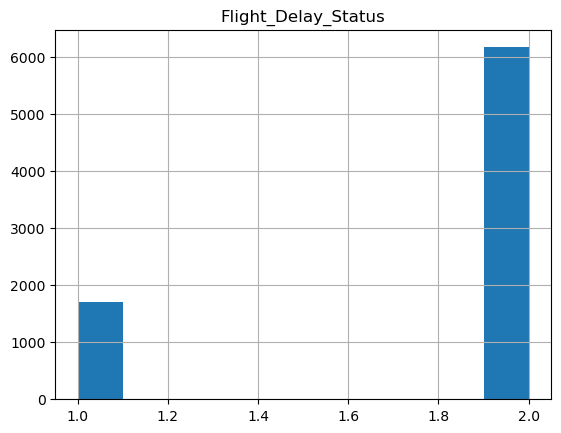

In [115]:
# Since we are predicting delays, using a threshold of 
#15 minutes to categorize a delay leads to the delays being the majority class.
train.hist(column='Flight_Delay_Status') 

<AxesSubplot:xlabel='Destination', ylabel='count'>

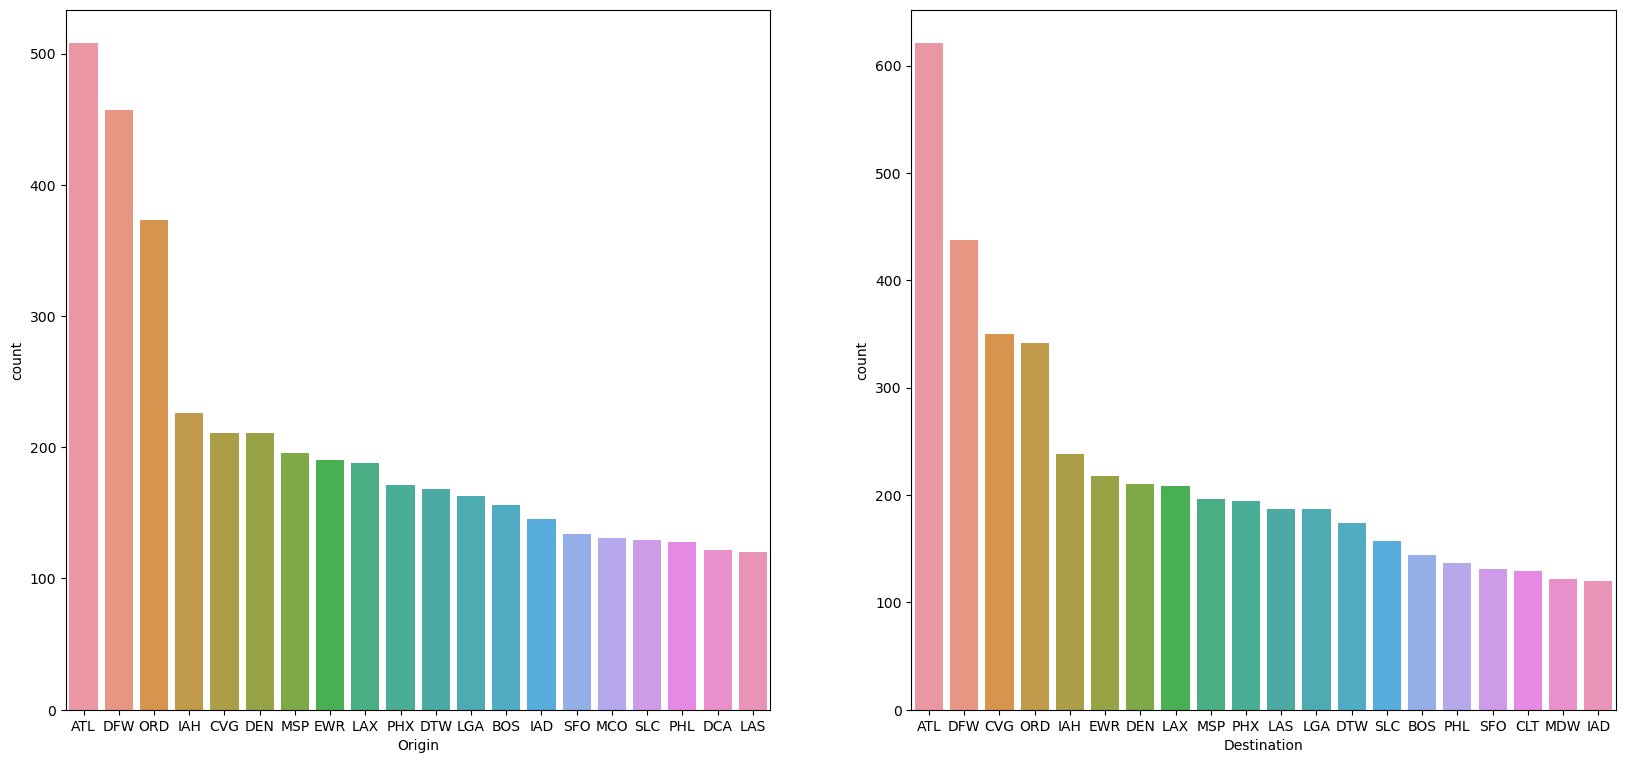

In [116]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x='Origin', data=train, order=train['Origin'].value_counts().iloc[:20].index)

plt.subplot(2,2,2)
sns.countplot(x='Destination', data=train, order=train['Destination'].value_counts().iloc[:20].index)
  
# A majority of flights are occuring between ATL, ORD, DFW, DEN, and IAH.  
#Frequency of Originating and Departing Airports
#Viewing top 20 Originating and Departing Airports

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

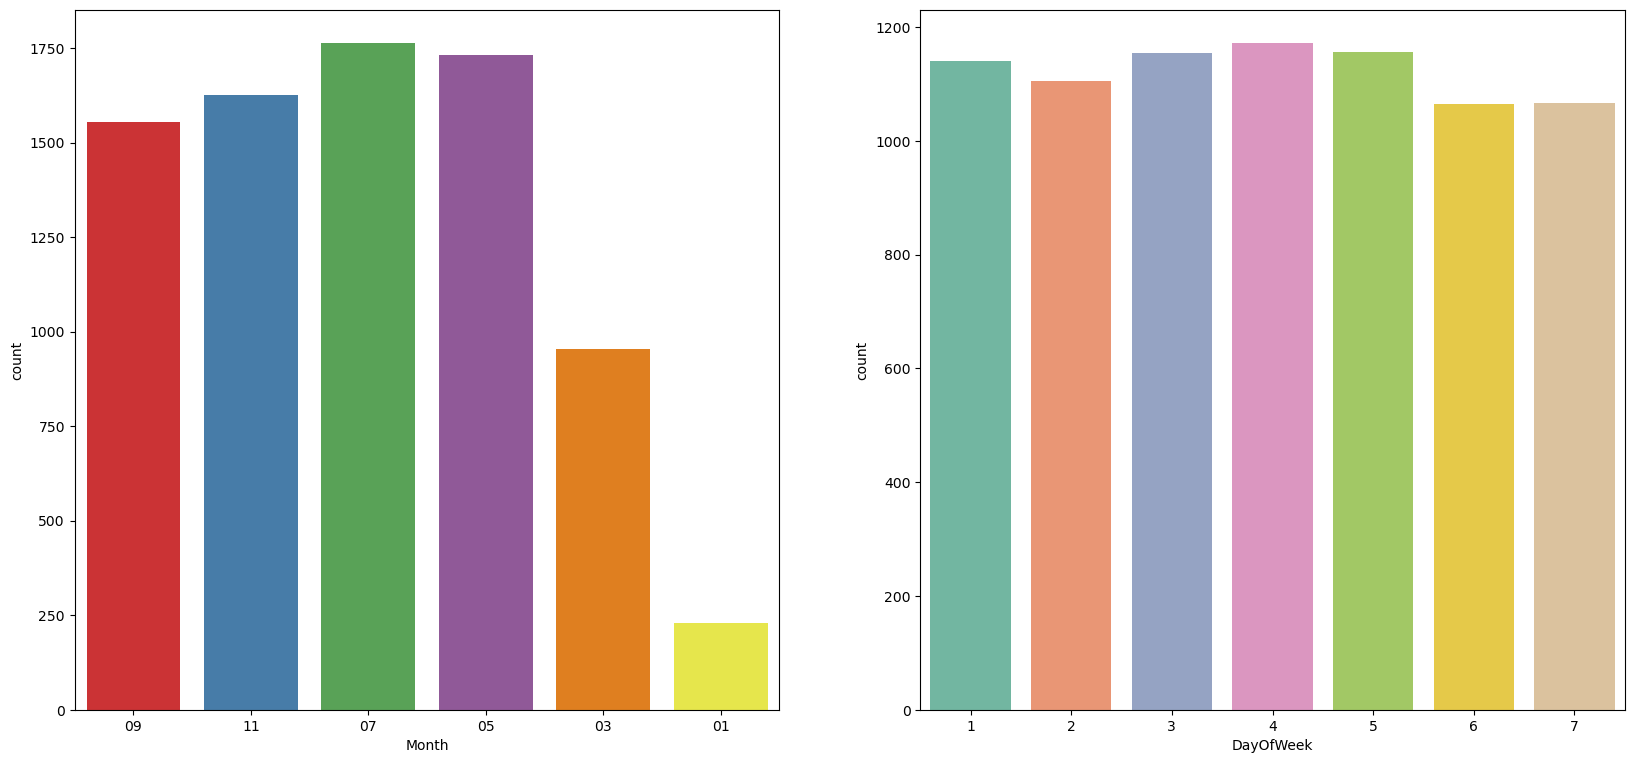

In [117]:
plt.figure(figsize = (20,20))

plt.subplot(2,2,1)
sns.countplot(x = 'Month', palette='Set1', data = train)

plt.subplot(2,2,2)
sns.countplot(x = 'DayOfWeek', palette='Set2', data = train)

#Seasonal effect
#Month effect:
#There is more data for the months of July and May 2004. 
#This can be expected as travelling is popular during the end of the year. 
#The summer months also see an uptick in flights data.

#Week effect:
#It seems that there are most fligths on Thursday (4) according to our datset.   

<AxesSubplot:xlabel='Destination', ylabel='count'>

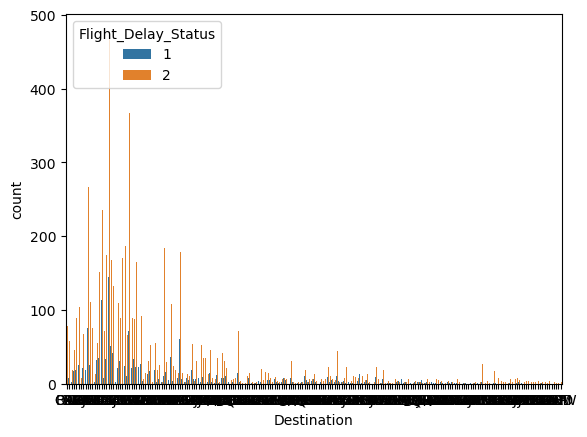

In [118]:
sns.countplot(x='Destination',hue='Flight_Delay_Status',data=train)
# There is huge number of flight delays

In [119]:
train.columns

Index(['FlightNumber', 'UTC_Deptime', 'Month', 'DayOfWeek', 'UTC_Arrtime',
       'ScheduledTravelTime', 'Origin', 'Destination', 'Distance',
       'UTC_actual_arr', 'Delaytime', 'Flight_Delay_Status', 'Origin_ws_id',
       'Destination_ws_id', 'Origin_GroH', 'Origin_StaH', 'Origin_BaroH',
       'Des_GroH', 'Des_StaH', 'Des_BaroH', 'Dep_avg', 'Origin_Hurpre',
       'Arr_avg', 'Des_Hurpre', 'Ori_SkyCon', 'Ori_DBT', 'Ori_DewPT',
       'Ori_RelHumiP', 'Ori_WindSpeed', 'Ori_WindDir', 'Ori_WindGu',
       'Ori_StaPre', 'Ori_Visib', 'Des_SkyCon', 'Des_DBT', 'Des_DewPT',
       'Des_RelHumP', 'Des_WindS', 'Des_WindDir', 'Des_WindGust', 'Des_Stapre',
       'Des_Visib', 'y'],
      dtype='object')

In [120]:
# dropping unneccesary columns
train=train.drop(['Delaytime','UTC_Deptime','UTC_Arrtime','UTC_actual_arr','Ori_SkyCon','Des_SkyCon','y'],axis=1)

# Visualization by HeatMap

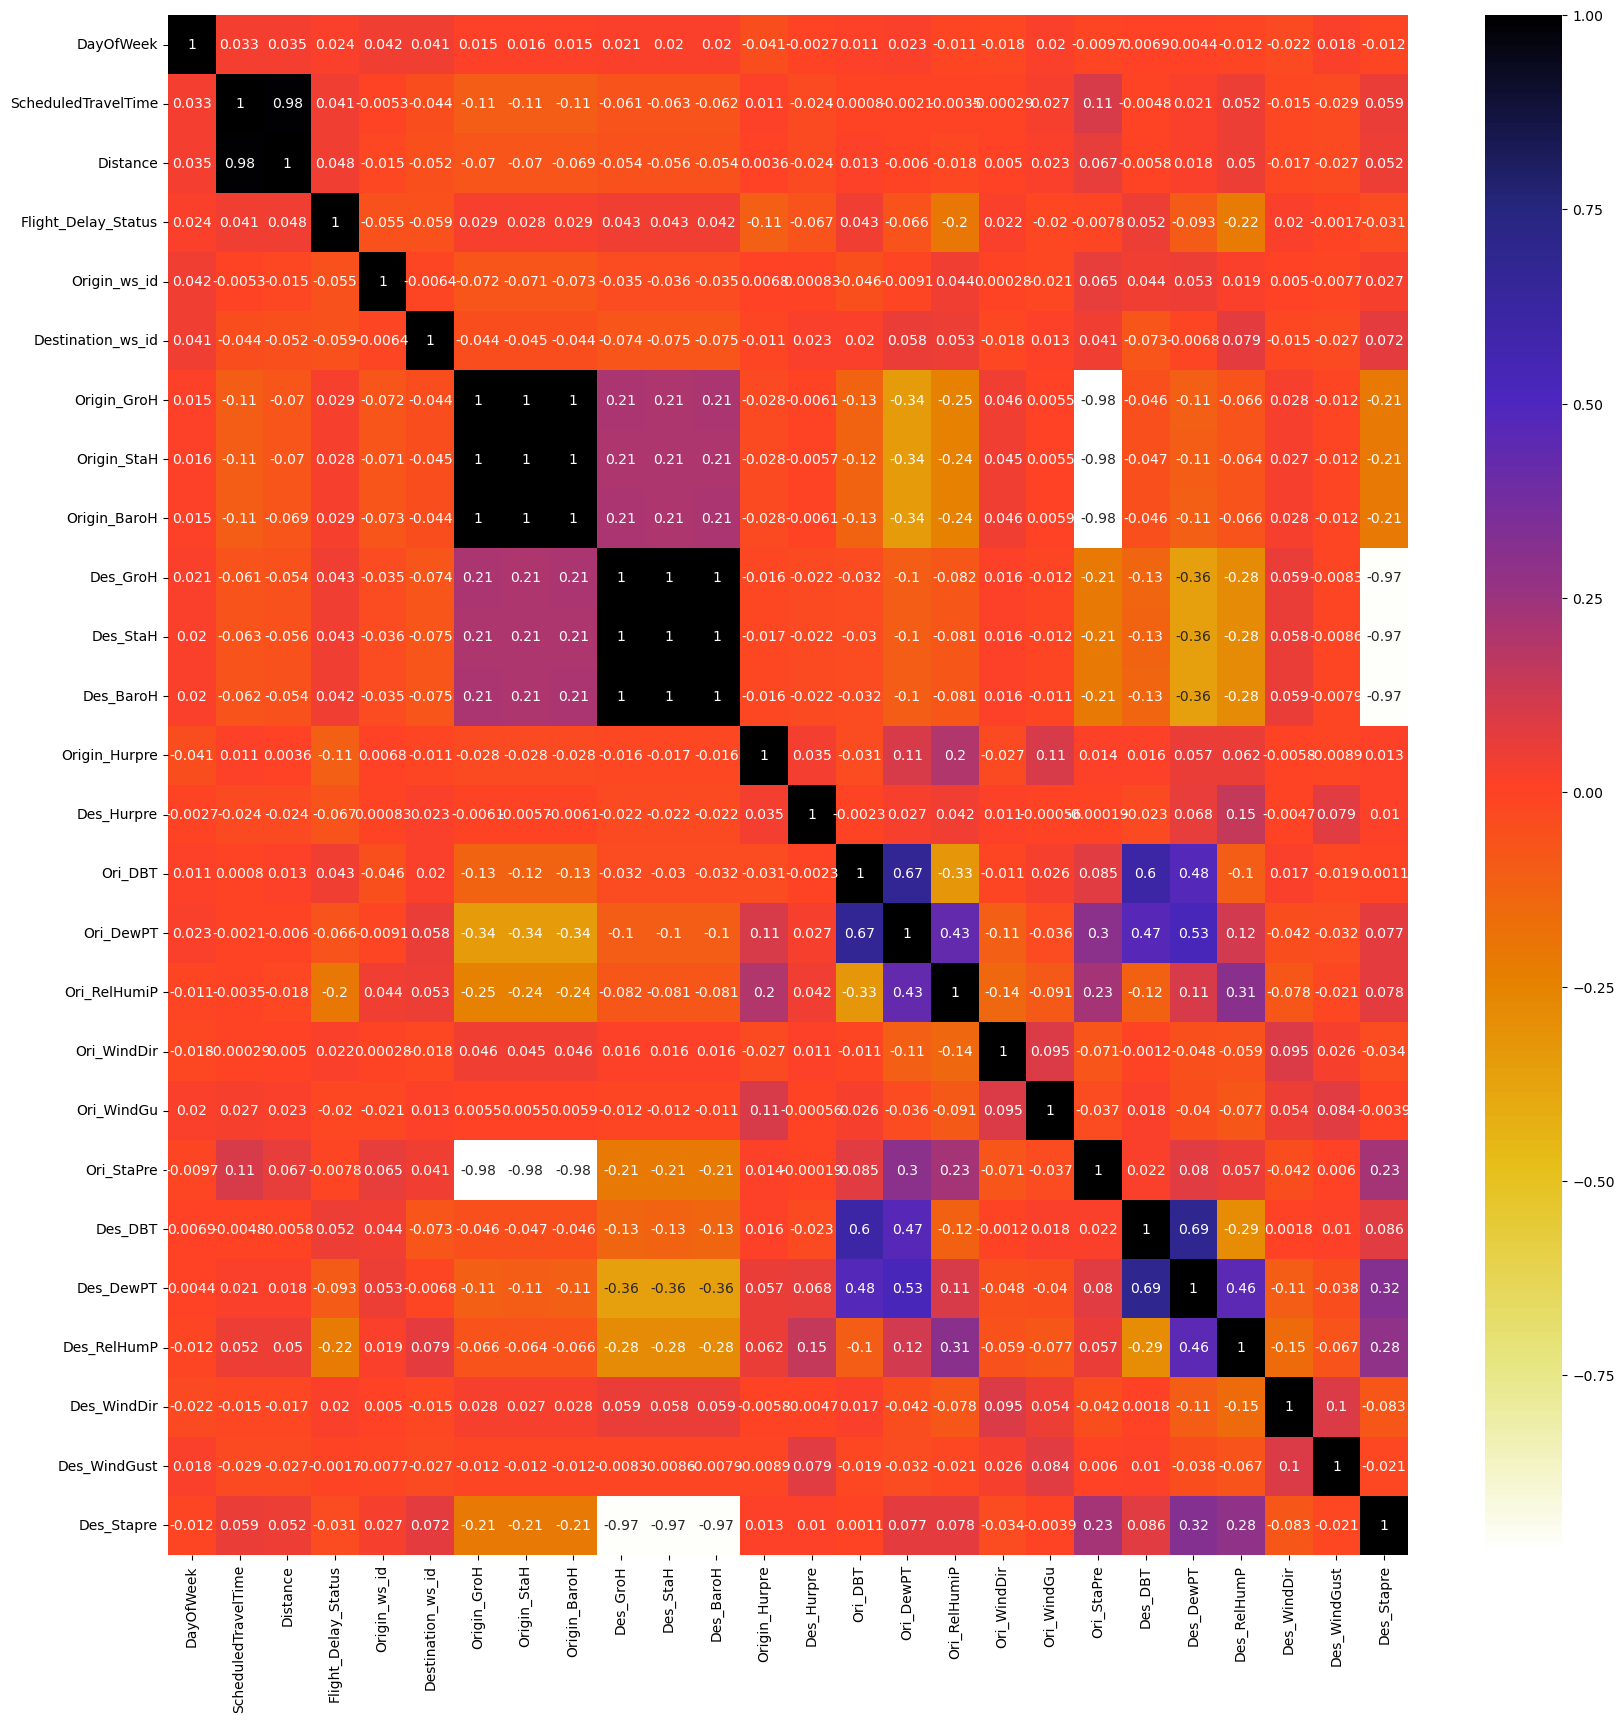

In [121]:
# checking correlation between the features

plt.figure(figsize=(20,20))
cor=train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FlightNumber         7861 non-null   object        
 1   Month                7861 non-null   object        
 2   DayOfWeek            7861 non-null   int64         
 3   ScheduledTravelTime  7861 non-null   int64         
 4   Origin               7861 non-null   object        
 5   Destination          7861 non-null   object        
 6   Distance             7861 non-null   int64         
 7   Flight_Delay_Status  7861 non-null   int64         
 8   Origin_ws_id         7861 non-null   int64         
 9   Destination_ws_id    7861 non-null   int64         
 10  Origin_GroH          7861 non-null   int64         
 11  Origin_StaH          7861 non-null   int64         
 12  Origin_BaroH         7861 non-null   int64         
 13  Des_GroH             7861 non-nul

In [123]:
train = train.to_csv('trainresult.csv')